A python program to get the tweets from twitter using twittwer api and get the sentiment score.

In [23]:
#----------import libraries----------
import tweepy
from textblob import TextBlob
import pandas as pd
import numpy as np
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [24]:
#----------Twiter api credentials----------
c_key = 'cRjT9hq0hpoHjpCYM9c8XGTQe'
c_secret = '6he7tK6KH4A1oqVqiu3djCgpu1dtCHXijftKoVfIkyGdY2vUWi'
a_key = '740485466382868480-P9COIlo5B3ddDlndomlmWCyd1TvDRW1'
a_secret = 'gUbKMd2tuRJFugGwGZP77gUkxSIHQQoWlcJPiI4jAnk0k'

In [25]:
#----------Authentication objects----------
authenticate =tweepy.OAuthHandler(c_key,c_secret)

authenticate.set_access_token(a_key,a_secret)

#api obj while passing the auth information

api =tweepy.API(authenticate,wait_on_rate_limit=True)

In [26]:
#Extracting post from user

posts= api.user_timeline(screen_name="BillGates", count =100,lang ="en",tweet_mode="extended")

print("show the 5 recent tweets \n")
i=1
for tweet in posts[0:5]:
  print(str(i)+') '+tweet.full_text +'\n')
  i=i+1

show the 5 recent tweets 

1) For decades, @Rotary has worked tirelessly to #EndPolio. Today, the health infrastructure they’ve built around the world is supporting the COVID-19 response. #WorldPolioDay https://t.co/67liH7akNH

2) RT @StephenCurry30: Even with his busy schedule, Dr. Fauci took the time to sit down with me (AGAIN) and talk about what we’ve gotten right…

3) I’ve been working for some time on a book about what we need to do over the next decade to avoid a climate disaster. I’m excited that it will be published on February 16. https://t.co/M9QYX93fd5

4) It’s inspiring to see so much passion these days for dealing with climate change, and to know that the world has set some ambitious goals for solving it. What we need now are practical plans to reach those goals.

5) India’s research and manufacturing capacity are critical for fighting COVID-19. Thank you @narendramodi for speaking at today’s Grand Challenges meeting. @PMOIndia https://t.co/ZMmIL0xxWi



In [27]:
#dataframe for tweets
df =pd.DataFrame([tweet.full_text for tweet in posts],columns=['Tweets'])
df.head()

,Tweets
0,"For decades, @Rotary has worked tirelessly to ..."
1,RT @StephenCurry30: Even with his busy schedul...
2,I’ve been working for some time on a book abou...
3,It’s inspiring to see so much passion these da...
4,India’s research and manufacturing capacity ar...


In [28]:
#clean the text
#fn
def cleanTxt(text):
  text= re.sub(r'@[a-zA-Z0-9]+','',text)# removes @
  text= re.sub(r'#','',text)#removes #
  text=re.sub(r'RT[\s]+','',text)#removes RT
  text= re.sub(r'https?:\/\/\S+','',text)#removes url

  return text


df['Tweets']=df['Tweets'].apply(cleanTxt)
df


,Tweets
0,"For decades, has worked tirelessly to EndPoli..."
1,": Even with his busy schedule, Dr. Fauci took ..."
2,I’ve been working for some time on a book abou...
3,It’s inspiring to see so much passion these da...
4,India’s research and manufacturing capacity ar...
...,...
95,"Class of 2020, these are not easy times. But w..."
96,: To overcome COVID19 the world doesn’t just n...
97,There are over 100 different coronavirus vacci...
98,Humankind has never had a more urgent task tha...


In [29]:
#create a fn to get the subjectivity

def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#create 2 new columns : subjectivity and polarity 

df['Subjectivity']=df['Tweets'].apply(getSubjectivity)
df['Polarity']=df['Tweets'].apply(getPolarity)

#showing the new dataframes

df



,Tweets,Subjectivity,Polarity
0,"For decades, has worked tirelessly to EndPoli...",0.250000,0.250000
1,": Even with his busy schedule, Dr. Fauci took ...",0.294444,-0.027778
2,I’ve been working for some time on a book abou...,0.375000,0.187500
3,It’s inspiring to see so much passion these da...,0.650000,0.316667
4,India’s research and manufacturing capacity ar...,0.900000,0.250000
...,...,...,...
95,"Class of 2020, these are not easy times. But w...",0.833333,-0.216667
96,: To overcome COVID19 the world doesn’t just n...,0.000000,0.000000
97,There are over 100 different coronavirus vacci...,0.600000,0.000000
98,Humankind has never had a more urgent task tha...,0.292411,0.140625


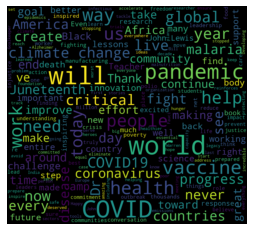

In [37]:
# plot the Word cloud

allwords=' '.join([twts for twts in df['Tweets']])
wordCloud =WordCloud(width = 1100,height=1000,random_state=21,max_font_size=119).generate(allwords)

plt.imshow(wordCloud,interpolation="bilinear")
plt.axis('off')
plt.show()

In [39]:
#create a fun to compute the sentiiment analysis

def getAnalysis(score):
  if score<0:
    return 'Negative'
  elif score==0:
    return 'Neutral'
  else:
    return 'Positive'
  
df['Analysis']=df['Polarity'].apply(getAnalysis)

df

,Tweets,Subjectivity,Polarity,Analysis
0,"For decades, has worked tirelessly to EndPoli...",0.250000,0.250000,Positive
1,": Even with his busy schedule, Dr. Fauci took ...",0.294444,-0.027778,Negative
2,I’ve been working for some time on a book abou...,0.375000,0.187500,Positive
3,It’s inspiring to see so much passion these da...,0.650000,0.316667,Positive
4,India’s research and manufacturing capacity ar...,0.900000,0.250000,Positive
...,...,...,...,...
95,"Class of 2020, these are not easy times. But w...",0.833333,-0.216667,Negative
96,: To overcome COVID19 the world doesn’t just n...,0.000000,0.000000,Neutral
97,There are over 100 different coronavirus vacci...,0.600000,0.000000,Neutral
98,Humankind has never had a more urgent task tha...,0.292411,0.140625,Positive


In [43]:

#print all of the positive tweets

j=1
sortedDF= df.sort_values(by=['Polarity'])
for i in range(0,sortedDF.shape[0]):
  if(sortedDF['Analysis'][i]=='Positive'):
    print(str(j)+') '+ sortedDF['Tweets'][i])
    print()
    j=j+1

1) For decades,  has worked tirelessly to EndPolio. Today, the health infrastructure they’ve built around the world is supporting the COVID-19 response. WorldPolioDay 

2) I’ve been working for some time on a book about what we need to do over the next decade to avoid a climate disaster. I’m excited that it will be published on February 16. 

3) It’s inspiring to see so much passion these days for dealing with climate change, and to know that the world has set some ambitious goals for solving it. What we need now are practical plans to reach those goals.

4) India’s research and manufacturing capacity are critical for fighting COVID-19. Thank you  for speaking at today’s Grand Challenges meeting.  

5) Europe has an opportunity to get its economy back on track in a way that creates good jobs and reinforces its global climate leadership. Here are 55 ideas on how Europe can develop and scale up the innovative technologies we'll need to reach net-zero. 

6) .’s work in the community is as

In [46]:
#print the negative tweets

j=1
sortedDFN=df.sort_values(by=['Polarity'],ascending='False')
for i in range(0,sortedDFN.shape[0]):
  if(sortedDFN['Analysis'][i]=='Negative'):
    print(str(j)+') '+ sortedDFN['Tweets'][i])
    print()
    j=j+1

1) : Even with his busy schedule, Dr. Fauci took the time to sit down with me (AGAIN) and talk about what we’ve gotten right…

2) : What do COVID-19 and malaria have to do with each other?  

When COVID-19 struck, it disrupted the entire global healt…

3) To prevent the worst effects of climate change, we need innovation across all sectors—especially in the hardest to decarbonize sectors—to get us on a viable path to net-zero emissions. 

4) Because of long-standing barriers that are made worse by COVID-19, hundreds of thousands of students with promise may never start college. This would be disastrous for these young people and for the country. Here’s what we’re doing to help: 

5) : Three lessons that have been central to the COVID19 response in South Africa, Liberia, &amp; other countries:
🔸 Screening…

6) Globally, a lack of medical oxygen–needed to treat pneumonia, malaria, and other diseases–leads to hundreds of thousands of deaths each year.  founded _Tele to address this often-

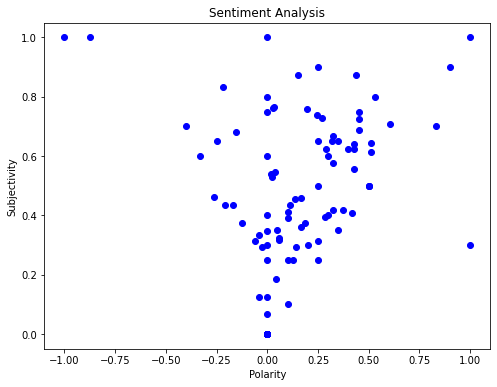

In [48]:
#Plot the polarity and subjectivity

plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
  plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [50]:
#Get the percentage 
ptweets =df[df.Analysis =='Positive']
ptweets=ptweets['Tweets']

round((ptweets.shape[0]/df.shape[0])*100,1)



61.0

In [51]:
#Get the percentage of negative 
ptweets =df[df.Analysis =='Negative']
ptweets=ptweets['Tweets']

round((ptweets.shape[0]/df.shape[0])*100,1)



15.0

In [52]:
#Get the percentage of neutral 
ptweets =df[df.Analysis =='Neutral']
ptweets=ptweets['Tweets']

round((ptweets.shape[0]/df.shape[0])*100,1)


24.0

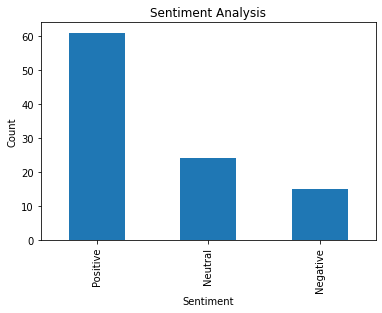

In [54]:
#show the count 

df['Analysis'].value_counts()
#plot and visualise the counts

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()